# This is assignment03

# Name:PENG CIYUAN

# Student ID:2018220161

# Link: https://github.com/pcyyyy/assignment03.git

# import packages for plotting graphs and manipulating data: 

In [13]:
from numpy import *
from matplotlib import pyplot as plt

# define a dataset

In [2]:
def loadDataSet(testSet):
     dataMat = []
     fr = open(testSet)
     for line in fr.readlines():
         curLine = line.strip().split('\t')
         fltLine = []
         for i in curLine:
             fltLine.append(float(i))
         dataMat.append(fltLine)
     return dataMat

# Calculate the distance between two vectors

In [3]:
def distEclud(vecA, vecB):
     return sqrt(sum(power(vecA - vecB, 2))) 

#  Pick K points at random

In [4]:
def randCent(dataSet, k):
     n = shape(dataSet)[1]
     centroids = mat(zeros((k,n)))
     for j in range(n):
         minJ = min(dataSet[:,j])
         rangeJ = float(max(array(dataSet)[:,j]) - minJ)
         centroids[:,j] = minJ + rangeJ * random.rand(k,1)
     return centroids   

# define  k-means algorithm

In [5]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
     m = shape(dataSet)[0]
     clusterAssment = mat(zeros((m,2)))                   
     centroids = createCent(dataSet, k)
     clusterChanged = True
     while clusterChanged:
         clusterChanged = False
         for i in range(m):
             minDist = inf
             minIndex = -1
             for j in range(k):
                 distJI = distMeas(centroids[j,:],dataSet[i,:])
                 if distJI < minDist:
                     minDist = distJI; minIndex = j
             if clusterAssment[i,0] != minIndex: 
                 clusterChanged = True
             clusterAssment[i,:] = minIndex,minDist**2
         print (centroids)
         for cent in range(k):
             ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
             centroids[cent,:] = mean(ptsInClust, axis=0)  
     return centroids, clusterAssment

# plot the graphs

In [9]:
def show(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
    plt.show()

# Run the k-means algorithm

[[ 3.30482143  1.81871899]
 [ 3.15922875  1.2650837 ]
 [-2.14346818  2.40011681]
 [-0.55667391  2.29735354]]
[[ 2.74703076  3.30032465]
 [ 2.76896036 -2.23560073]
 [-3.10532438 -0.12876332]
 [-0.2521765   1.1222785 ]]
[[ 2.73184457  3.01548295]
 [ 2.63810053 -2.99805137]
 [-3.49409433 -1.28852678]
 [-1.64931969  2.69809469]]
[[ 2.73184457  3.01548295]
 [ 2.54140545 -2.87212285]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]]
[[ 2.73184457  3.01548295]
 [ 2.54140545 -2.87212285]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]]


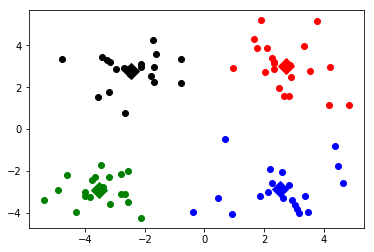

In [14]:
def main():
    dataMat = mat(loadDataSet('testSet.txt'))
    myCentroids, clustAssing= kMeans(dataMat,4)
    print(myCentroids)
    show(dataMat, 4, myCentroids, clustAssing)
if __name__ == '__main__':
     main()